<a href="https://colab.research.google.com/github/mgarbanzo/AgrometeoUCR/blob/main/Agrometeorolog%C3%ADa_UCR_2021_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install netcdf4
!pip uninstall -y shapely imgaug
!pip install cartopy
!pip install shapely --no-binary shapely --force
!pip install boto3

     |████████████████████████████████| 1.6MB 3.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Found existing installation: Shapely 1.7.1
Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1
Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Successfully uninstalled imgaug-0.2.9
     |████████████████████████████████| 12.1 MB 157 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 53.0 MB/s 
     |████████████████████████████████| 1.0 MB 62.9 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516222 sha256=eed94595c8cae35c623ab7aafeeed6a62aac7cd680c98f00f96d80dd45b05a2e
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: file

In [ ]:
!wget -c https://www.dropbox.com/s/i8j1g9xg1g7o56l/utilities.py

--2021-05-13 17:48:19--  https://www.dropbox.com/s/i8j1g9xg1g7o56l/utilities.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/i8j1g9xg1g7o56l/utilities.py [following]
--2021-05-13 17:48:19--  https://www.dropbox.com/s/raw/i8j1g9xg1g7o56l/utilities.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc1f220ebc6fd57b73345aa2372.dl.dropboxusercontent.com/cd/0/inline/BObCHL812icR3_HRhH7h5bTq1A-QikY6INkpDbDXUrlEwMD7JIMf0MLalUS8IiGFsa79tMhr_eNh2xsV4IEm8WsHSXBhLYP8irgun3j9QrGXsZ-mV5wy9GGOAwbLbS_vepBJyFN5SVcUNizQ5h24dwj8/file# [following]
--2021-05-13 17:48:20--  https://ucc1f220ebc6fd57b73345aa2372.dl.dropboxusercontent.com/cd/0/inline/BObCHL812icR3_HRhH7h5bTq1A-QikY6INkpDbDXUrlEwMD7JIMf0MLalUS8IiGFsa79tMhr_eNh2xsV4IEm8WsHSX

In [ ]:
#!dpkg -l | grep libgdal
#!ogrinfo --version
#!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
#!add-apt-repository -y ppa:ubuntugis/ppa
#!apt update
#!apt upgrade
#!apt-get install gdal-bin
#!ogrinfo --version
#!pip install 'gdal==3.0.4'

ii  libgdal-dev                            2.2.3+dfsg-2                        amd64        Geospatial Data Abstraction Library - Development files
ii  libgdal20                              2.2.3+dfsg-2                        amd64        Geospatial Data Abstraction Library
GDAL 2.2.3, released 2017/11/20
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  

(397, 400) (397, 400)


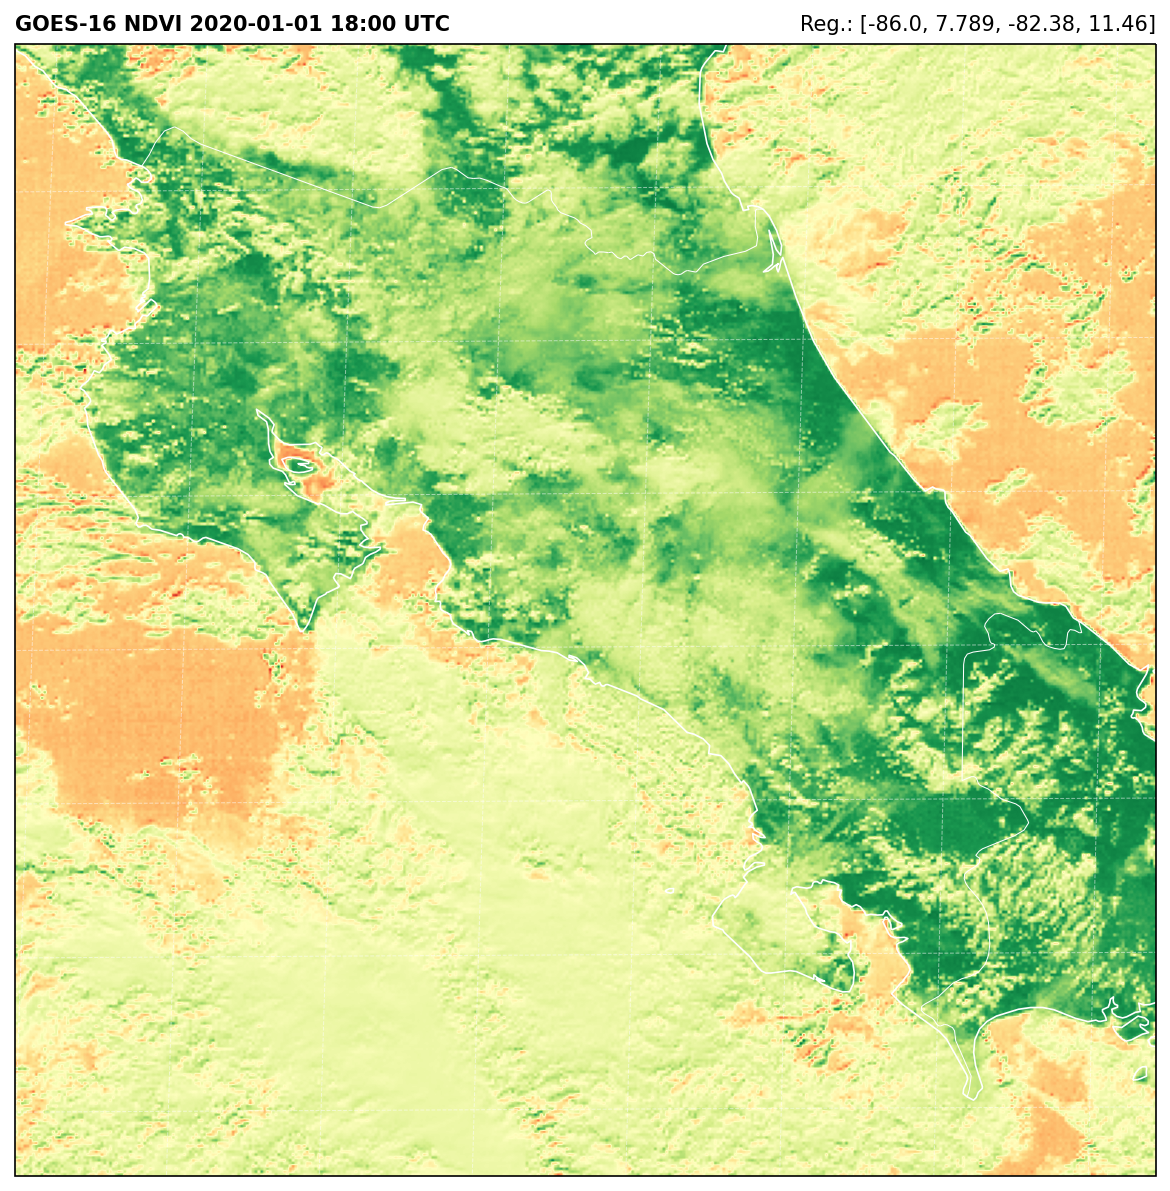

In [14]:
# Training: Python and GOES-R Imagery: Script 13 - Cropping the Full Disk and Creating an RGB
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset              # Read / Write NetCDF4 files
import matplotlib.pyplot as plt          # Plotting library
from datetime import datetime            # Basic Dates and time types
import cartopy, cartopy.crs as ccrs      # Plot maps
import numpy as np                       # Scientific computing with Python
import os                                # Miscellaneous operating system interfaces
from utilities import download_CMI       # Our own utilities
from utilities import geo2grid, latlon2xy, convertExtent2GOESProjection      # Our own utilities
#-----------------------------------------------------------------------------------------------------------
# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process
yyyymmddhhmn = '202001011800'

# Desired extent
extent = [-86.0, 7.789, -82.38, 11.46] # Min lon, Max lon, Min lat, Max lat

#-----------------------------------------------------------------------------------------------------------
# Download the necessary bands from AWS
file_ch02 = download_CMI(yyyymmddhhmn, 2, input)
file_ch03 = download_CMI(yyyymmddhhmn, 3, input)

#-----------------------------------------------------------------------------------------------------------
# Open the GOES-R images
file_ch02 = Dataset(f'{input}/{file_ch02}.nc')
file_ch03 = Dataset(f'{input}/{file_ch03}.nc')
#-----------------------------------------------------------------------------------------------------------                   
# Convert lat/lon to grid-coordinates
lly, llx = geo2grid(extent[1], extent[0], file_ch02)
ury, urx = geo2grid(extent[3], extent[2], file_ch02)

# Get the pixel values
data_ch02 = file_ch02.variables['CMI'][ury:lly, llx:urx][::2 ,::2] 
#-----------------------------------------------------------------------------------------------------------
# Convert lat/lon to grid-coordinates
lly, llx = geo2grid(extent[1], extent[0], file_ch03)
ury, urx = geo2grid(extent[3], extent[2], file_ch03)

# Get the pixel values
data_ch03 = file_ch03.variables['CMI'][ury:lly, llx:urx][::1 ,::1] 
#-----------------------------------------------------------------------------------------------------------
print(np.shape(data_ch03),np.shape(data_ch02))
# Make the arrays equal size

cordX = np.shape(data_ch02)[0], np.shape(data_ch03)[0]
cordY = np.shape(data_ch02)[1], np.shape(data_ch03)[1]

minvalX = np.array(cordX).min()
minvalY = np.array(cordY).min()

data_ch02 = data_ch02[0:minvalX, 0:minvalY]
data_ch03 = data_ch03[0:minvalX, 0:minvalY]
#-----------------------------------------------------------------------------------------------------------
# Compute data-extent in GOES projection-coordinates
img_extent = convertExtent2GOESProjection(extent)              
#-----------------------------------------------------------------------------------------------------------

NDVI = (data_ch03 - data_ch02)/(data_ch03 + data_ch02)

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10), dpi=150)

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))

# Plot the image
colormap = "RdYlGn"
img = ax.imshow(NDVI, origin='upper', extent=img_extent, cmap=colormap)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# Extract date
date = (datetime.strptime(file_ch02.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 NDVI ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/NDVI.png', bbox_inches='tight', pad_inches=0, dpi=300)
            
# Show the image
plt.show()